In [21]:
from neo4j import GraphDatabase, basic_auth

driver = GraphDatabase.driver(
  "bolt://localhost:7687",
  auth=basic_auth("neo4j", "password"))


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd



Direct Bearer shares vs CPI score 


In [28]:
blacklist = pd.read_csv('data/targets.simple.csv')
display(blacklist.head())
c_taxes = pd.read_csv('data/corporate_taxes.csv')
display(c_taxes.head())
centrality_df = pd.read_csv('data/centrality_scores.csv')
display(centrality_df.head())
cpi_df = pd.read_csv('data/cpi2015.csv')
display(cpi_df.head())
degree_centrality = pd.read_csv('data/eigenvector_similarity_scores.csv')
final_df = pd.read_csv('data/num_bear_plus_country.csv')
bearer = pd.read_csv('data/bear_shares_per_entity.csv')
bearer

,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,phones,emails,dataset,first_seen,last_seen
0,arpet-entidades-13,Organization,VALUMAR LLC,NaN,NaN,NaN,NaN,NaN,ARG List - Unidad de Información Financiera - ...,NaN,NaN,Argentine RePET,2022-02-10 02:00:22,2022-04-01 18:20:38
1,arpet-personas-10,Person,Hadi Soleimanpour,NaN,1956-01-13;1960-08-24,ir,NaN,0006686;008589;10720,ARG List - UFI AMIA - 2019-07-26,NaN,NaN,Argentine RePET,2022-02-10 02:00:22,2022-04-01 18:20:38
2,arpet-personas-11,Person,Alí Fallahijan,NaN,1994,ir,NaN,NaN,ARG List - UFI AMIA - 2019-07-26,NaN,NaN,Argentine RePET,2022-02-10 02:00:22,2022-04-01 18:20:38
3,arpet-personas-15,Person,Ahmad Reza Asghari,NaN,1961-06-11,ir,NaN,008664,ARG List - UFI AMIA - 2019-07-26,NaN,NaN,Argentine RePET,2022-02-10 02:00:22,2022-04-01 18:20:38
4,arpet-personas-19,Person,hussein mohamed jomma,NaN,NaN,NaN,NaN,NaN,ARG List - U.I.F - 2019-08-09,NaN,NaN,Argentine RePET,2022-02-10 02:00:22,2022-04-01 18:20:38


,Unnamed: 0,Country,Corporate tax (excl. dividend taxes)
0,0,Afghanistan,20.0
1,1,Albania,15.0
2,2,Algeria,26.0
3,3,American Samoa,34.0
4,4,Andorra,10.0


,entity,score
0,ACCELONIC LTD.,64.317563
1,VELA GAS INVESTMENTS LTD.,50.576574
2,Dale Capital Group Limited,29.071236
3,BOB AGENTS LIMITED,21.588562
4,GNG LTD.,19.402875


,Country,CPI score 2015,Sources 2015,Standard error 2015
0,Denmark,91,7.0,2.16
1,New Zealand,91,7.0,2.32
2,Finland,90,7.0,1.77
3,Singapore,85,8.0,2.02
4,Sweden,89,7.0,1.71


,Unnamed: 0,E.name,E.countries,total
0,0,DECARIA COMPANY LTD.,Samoa,2
1,1,DRAGONTLY TELECOMMUNICATIONS INC.,Samoa,15
2,2,FOREVER FAITH FINANCE LTD.,Seychelles,20
3,3,AGAMENON INVESTMENTS LIMITED,Spain,2
4,4,FOXBOURNE LIMITED,Luxembourg,2
...,...,...,...,...
30813,30813,Middlebeers Ltd.,United States,1
30814,30814,Trans Yula Corporation,Panama,1
30815,30815,JAFLC Capital Management Ltd.,United States,1
30816,30816,Brickside Limited,Canada,1


In [91]:
#merged num bear with 
final_df = bearer.merge(c_taxes,left_on='E.countries',right_on='Country')
#sns.scatterplot(x='Corporate tax (excl. dividend taxes)',y='total',data=final_df)
#final_df = final_df.merge(cpi_df, left_on='Country',right_on='Country')
final_df = final_df[['E.name','total','Country','Corporate tax (excl. dividend taxes)']]
final_df.sort_values(by='total')
final_df = final_df.rename(columns = {'E.name':'name','total':'num_bear','Corporate tax (excl. dividend taxes)':'Corporate tax'})
final_df = final_df.merge(centrality_df,left_on = 'name',right_on='entity')
final_df = final_df.rename(columns = {'score':'pagerank_score'})
final_df = final_df.drop(columns = ['entity'])
final_df = final_df.merge(cpi_df,left_on='Country',right_on='Country')
final_df = final_df.drop(columns = ['Sources 2015','Standard error 2015'])
final_df = final_df.merge(degree_centrality,left_on='name',right_on='entity')
final_df = final_df.drop(columns  = 'entity')
final_df = final_df.rename(columns={'score':'eigen_score'})
final_df['eigen_score'] = 10**107 * final_df['eigen_score']
final_df['eigen_score'] = final_df['eigen_score'].apply(lambda x: round(x, 3))



In [92]:
#final_df.to_csv('data/final_df.csv')
#sns.scatterplot(x=final_df['eigen_score'],y=final_df['num_bear'])
#sns.histplot(x=final_df['eigen_score'])
#final_df['eigen_score']
#dropped 
final_df = (final_df.sort_values(by='eigen_score'))[:-1]
final_df

,name,num_bear,Country,Corporate tax,pagerank_score,CPI score 2015,eigen_score
30995,NORTHVIEW HOLDINGS INC.,4,Bahamas,0.00,0.820406,68,1.200
32245,MIRAGE INVESTMENTS SERVICE INC.,1,Bahamas,0.00,0.387136,68,1.200
32242,FOREVA INC.,2,Bahamas,0.00,0.405068,68,1.200
28211,CAMROSE LIMITED,2,Jersey,0.00,0.738817,43,1.200
32240,FOREVA INC.,2,Bahamas,0.00,0.536808,68,1.200
...,...,...,...,...,...,...,...
1131,KEINES INVESTMENTS LIMITED,2,Spain,25.00,15.909000,58,150.061
32570,BOB AGENTS LIMITED,165,Hong Kong,16.50,21.588562,75,206.484
1446,GNG LTD.,200,Seychelles,33.00,19.402875,55,242.498
21036,INGELSA LTD.,107,Dominican Republic,27.00,18.064258,33,322.931


In [83]:
final_df.dtypes

name               object
num_bear            int64
Country            object
Corporate tax     float64
pagerank_score    float64
CPI score 2015      int64
eigen_score       float64
dtype: object

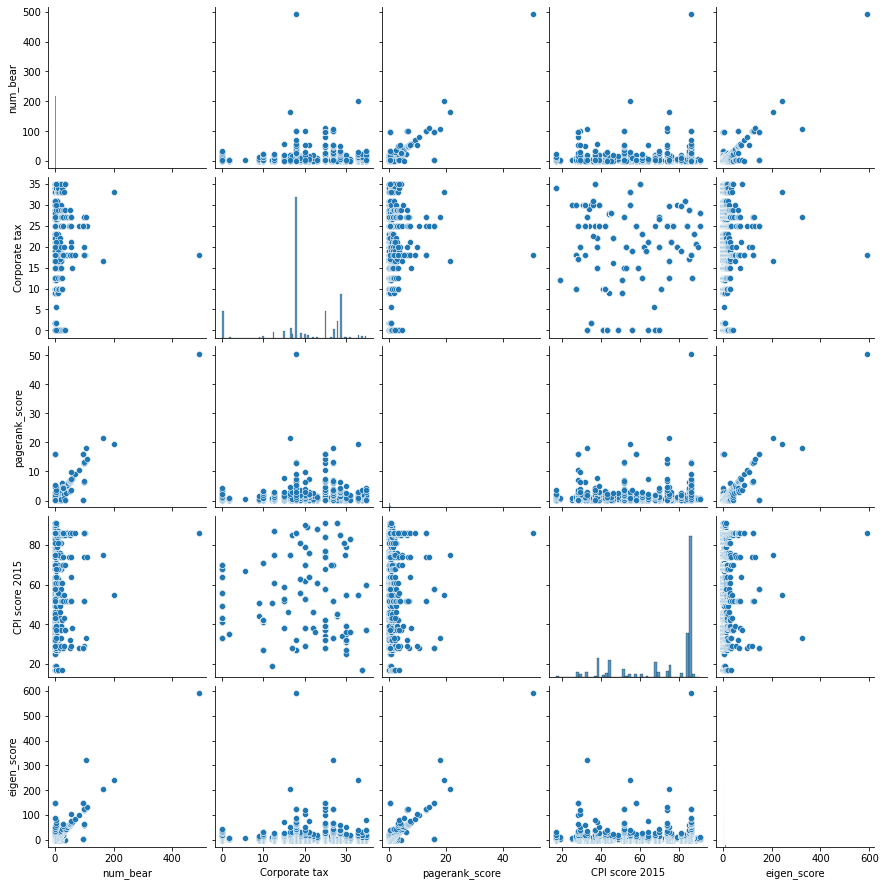

In [93]:
sns.pairplot(final_df)

30818
195


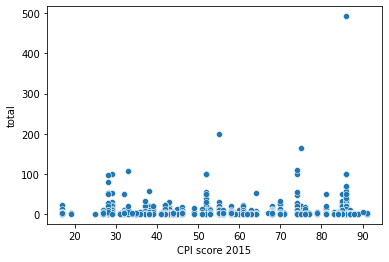

,E.name,E.countries,total,Country,CPI score 2015,Sources 2015,Standard error 2015
0,DECARIA COMPANY LTD.,Samoa,2,Samoa,52,NaN,NaN
1,DRAGONTLY TELECOMMUNICATIONS INC.,Samoa,15,Samoa,52,NaN,NaN
2,NUKA B.V.,Samoa,1,Samoa,52,NaN,NaN
3,PALLISSER & PENDERGAST INC.,Samoa,1,Samoa,52,NaN,NaN
4,LONEY TRADING LTD.,Samoa,2,Samoa,52,NaN,NaN
...,...,...,...,...,...,...,...
30035,SUZANNE CORP.,India,2,India,38,8.0,3.14
30036,HANSAN CORP.,India,2,India,38,8.0,3.14
30037,SAUCHER HOLDING CORPORATION,Kenya,2,Kenya,25,8.0,3.02
30038,Flexi-mobile Limited,Kenya,2,Kenya,25,8.0,3.02


In [23]:
num_bear = pd.read_csv('data/num_bear_plus_country.csv')
cpi = pd.read_csv('data/cpi2015.csv')
centrality = pd.read_csv('data/centrality_scores.csv')
print(num_bear.shape[0])
print(cpi.shape[0])
bear_cpi = num_bear.merge(cpi,left_on='E.countries',right_on='Country')
sns.scatterplot(x='CPI score 2015',y='total',data= bear_cpi)
plt.show()
bear_cpi

Clustering


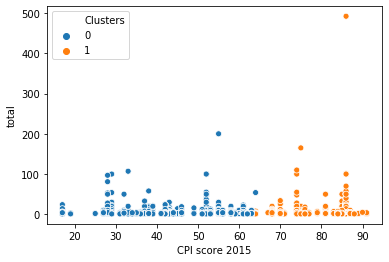

In [3]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(bear_cpi[['total','CPI score 2015']])
bear_cpi['Clusters']=kmeans.labels_
bear_cpi
sns.scatterplot(x='CPI score 2015',y='total',data=bear_cpi,hue='Clusters')

## Testing for the whole panama papers dataset


In [19]:
import zipfile
zf = zipfile.ZipFile('data/degree_centrality_scores.csv.zip') 
# if you want to see all files inside zip folder
zf.namelist() 
# now read your csv file 
degree_centrality = pd.read_csv(zf.open('degree_centrality_scores.csv'))
zf = zipfile.ZipFile('data/eigenvector_similarity_scores.csv.zip') 
# if you want to see all files inside zip folder
zf.namelist() 
# now read your csv file 
eigen_centrality = pd.read_csv(zf.open('eigenvector_similarity_scores.csv'))
display(degree_centrality.head())
eigen_centrality.head()

,entity,Category,node_type,degree_cent_score
0,Portcullis TrustNet (BVI) Limited,Offshore Leaks,['Intermediary' 'Officer'],36365.0
1,Morning Star Holdings Limited,Paradise Papers - Nevis corporate registry,['Intermediary'],35358.0
2,MOSSACK FONSECA & CO. (BAHAMAS) LIMITED,Bahamas Leaks,['Intermediary'],14901.0
3,UBS TRUSTEES (BAHAMAS) LTD.,Bahamas Leaks,['Intermediary'],9717.0
4,CREDIT SUISSE TRUST LIMITED,Bahamas Leaks,['Intermediary'],8299.0


,entity,Category,node_type,eigen_vec_score
0,ACCELONIC LTD.,Panama Papers,['Entity'],0.208701
1,Dale Capital Group Limited,Panama Papers,['Entity'],0.104873
2,VELA GAS INVESTMENTS LTD.,Panama Papers,['Entity'],0.102179
3,WAN CHI INVESTMENTS LIMITED,Offshore Leaks,['Entity'],0.093474
4,HANNSPREE INC.,Offshore Leaks,['Entity'],0.091402


In [2]:
degrees = pd.read_csv('data/new/degree.csv')
pageranks = pd.read_csv('data/new/pagerank.csv')
display(degrees.sort_values(by='node_type'))
pageranks['Category'] = pageranks['Category'].apply(lambda x:(x.split(' -'))[0])
degrees['Category'] = degrees['Category'].apply(lambda x:(x.split(' -'))[0])

,entity,Category,node_type,score
787697,WOLFBRIDGE LIMITED,Panama Papers,[Entity],0.0
1049721,ECW LIMITED,Paradise Papers - Malta corporate registry,[Entity],0.0
1049720,ENERGY ADVANCED K.A. LIMITED,Paradise Papers - Malta corporate registry,[Entity],0.0
1049719,MARTINIK HOLDING LIMITED,Paradise Papers - Malta corporate registry,[Entity],0.0
1049718,VORTEX LIMITED,Paradise Papers - Malta corporate registry,[Entity],0.0
...,...,...,...,...
510118,PALAT VADHANAVISALA,"Pandora Papers - Alemán, Cordero, Galindo & Le...",[Officer],1.0
510117,ARVID TAGE,"Pandora Papers - Alemán, Cordero, Galindo & Le...",[Officer],1.0
510116,MOHAMAD BADUI,"Pandora Papers - Alemán, Cordero, Galindo & Le...",[Officer],1.0
510125,PHILIPPE CLAUDE IRENE JACKSON,"Pandora Papers - Alemán, Cordero, Galindo & Le...",[Officer],1.0


In [27]:
pageranks.to_csv('pageranks.csv')

In [23]:
#Dataframes of each leak
panama = pageranks[pageranks['Category']=='Panama Papers']
paradise = pageranks[pageranks['Category']=='Paradise Papers']
pandora = pageranks[pageranks['Category']=='Pandora Papers']
bahamas = pageranks[pageranks['Category']=='Bahamas Leaks']
offshore = pageranks[pageranks['Category']=='Offshore Leaks']


In [25]:
pandora

,entity,Category,node_type,pageRank_score,country
524,DANSUNN FINANCE LTD.,Pandora Papers,[Entity],4.102500,British Virgin Islands
577,LINAMO CORP,Pandora Papers,[Entity],3.853043,NaN
657,LJ SKYE SERVICES LIMITED,Pandora Papers,[Entity],3.596143,NaN
664,CORALENA INC.,Pandora Papers,[Entity],3.592500,British Virgin Islands
765,LJ Capital Partners Limited,Pandora Papers,[Entity],3.349091,NaN
...,...,...,...,...,...
1572670,ANTONIA BIENVENIDA LOPEZ DE ALBA,Pandora Papers,[Officer],0.150000,NaN
1572671,ALFREDO ALBA SANCHEZ,Pandora Papers,[Officer],0.150000,NaN
1572672,LUDMILA MARIA ALBA LOPEZ,Pandora Papers,[Officer],0.150000,NaN
1572673,NICOLLE HAGE CHARA,Pandora Papers,[Officer],0.150000,NaN


In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,50))
sns.scatterplot(x='pageRank_score',y='degree',hue='node_type',data=panama,s=140)



In [4]:
blacklist = pd.read_csv('data/blacklist.csv')
blacklist

,undef,entity,undef.1,country,undef.2,undef.3,undef.4,undef.5,undef.6,undef.7,undef.8,other_name
0,36,AEROCARIBBEAN AIRLINES,-0-,CUBA,-0-,-0-,-0-,-0-,-0-,-0-,-0-,-0-
1,173,"ANGLO-CARIBBEAN CO., LTD.",-0-,CUBA,-0-,-0-,-0-,-0-,-0-,-0-,-0-,-0-
2,306,BANCO NACIONAL DE CUBA,-0-,CUBA,-0-,-0-,-0-,-0-,-0-,-0-,-0-,a.k.a. 'BNC'.
3,424,BOUTIQUE LA MAISON,-0-,CUBA,-0-,-0-,-0-,-0-,-0-,-0-,-0-,-0-
4,475,CASA DE CUBA,-0-,CUBA,-0-,-0-,-0-,-0-,-0-,-0-,-0-,-0-
...,...,...,...,...,...,...,...,...,...,...,...,...
9847,36006,JESTAR SANAT DELIJAN,-0-,NPWMD] [IFSR,-0-,-0-,-0-,-0-,-0-,-0-,-0-,Additional Sanctions Information - Subject to ...
9848,36296,UNCHON TRADING CORPORATION,-0-,NPWMD,-0-,-0-,-0-,-0-,-0-,-0-,-0-,Secondary sanctions risk: North Korea Sanction...
9849,36297,SUNGNISAN TRADING CORPORATION,-0-,NPWMD,-0-,-0-,-0-,-0-,-0-,-0-,-0-,Secondary sanctions risk: North Korea Sanction...
9850,36298,HAPJANGGANG TRADING CORPORATION,-0-,NPWMD,-0-,-0-,-0-,-0-,-0-,-0-,-0-,Secondary sanctions risk: North Korea Sanction...


Merged data with black list and got 70 labels down below 

In [5]:
panama =pd.read_csv('data/new/panama.csv')
paradise = pd.read_csv('data/new/paradise.csv')
panama_and_paradise = pd.concat([paradise,panama],ignore_index = True)
panama_and_paradise
blacklist_merged = panama_and_paradise.merge(blacklist,left_on='entity',right_on='entity')
labels = blacklist_merged['entity'].unique()
def find_label(value):
    if value in labels:
        return 1 
    else: 
        return 0
panama_and_paradise['labels'] = panama_and_paradise['entity'].apply(find_label)


In [8]:
panama_and_paradise['labels'].sum()
panama_and_paradise

,entity,category,node_type,pagerank,degree,country,labels
0,"""A"" COMPANY INTERNATIONAL EXPORT, INC.",Paradise Papers,[Entity],0.787500,0,Barbados,0
1,"""A.T.L.I."" ARUBA'S TRAINING AND LANGUAGE INSTI...",Paradise Papers,[Entity],0.171250,0,Aruba,0
2,"""A.T.L.I."" ARUBA'S TRAINING AND LANGUAGE INSTI...",Paradise Papers,[Entity],0.239250,0,Aruba,0
3,"""ACRYLIC PRODUCTS LIMITED""",Paradise Papers,[Entity],0.150019,0,Bahamas,0
4,"""AEROCOSTA"" EXPRESS",Paradise Papers,[Entity],0.447500,0,Aruba,0
...,...,...,...,...,...,...,...
996546,Zyrostel Ltd.,Panama Papers,[Entity],0.151026,0,British Virgin Islands,0
996547,ZYRYA OIL FINANCE LTD.,Panama Papers,[Entity],0.151992,0,Niue,0
996548,ZYRYA TANK CONTAINERS LTD.,Panama Papers,[Entity],0.151992,0,British Virgin Islands,0
996549,ZZ INTERNATIONAL HOLDINGS LTD.,Panama Papers,[Entity],0.151170,0,British Virgin Islands,0


In [9]:
panama_and_paradise.to_csv('data/panama_paradise.csv')

In [33]:
import requests
import pandas as pd
data_params = {
    'q':'Mossack Fonseca',
    'api_token': 'ysyigAGAdYml7u4idgZ5'
}
result = requests.get( 'https://api.opencorporates.com/companies/search',params=data_params)
bv = result.json()


Labeling of nodes


In [36]:
def duration_activity(name):
    print(name)
    data_params = {
    'q':name
    }   
    result = requests.get( 'https://api.opencorporates.com/companies/search',params=data_params)

    bv = result.json()
    print(bv)
    if len(bv['results']['companies']) == 0:
        return None,None
    incorp = bv['results']['companies'][0]['company']['incorporation_date']
    dissolute = bv['results']['companies'][0]['company']['dissolution_date']
    activity = bv['results']['companies'][0]['company']['inactive']
    print(activity)



mossack fonseca
{'api_version': '0.4.8', 'results': {'companies': [{'company': {'name': 'CONIFER RIDGE LIMITED', 'company_number': '02942205', 'jurisdiction_code': 'gb', 'incorporation_date': '1994-06-23', 'dissolution_date': '2020-09-22', 'company_type': 'Private Limited Company', 'registry_url': 'https://beta.companieshouse.gov.uk/company/02942205', 'branch': None, 'branch_status': None, 'inactive': True, 'current_status': 'Dissolved', 'created_at': '2010-10-22T20:03:56+00:00', 'updated_at': '2020-09-23T11:09:39+00:00', 'retrieved_at': '2020-09-23T11:09:37+00:00', 'opencorporates_url': 'https://opencorporates.com/companies/gb/02942205', 'previous_names': [{'company_name': 'OAKWOOD EDGE LIMITED', 'start_date': '2017-12-04', 'end_date': '2018-01-24'}, {'company_name': 'DESERT ROAD LIMITED', 'start_date': '2017-11-21', 'end_date': '2017-12-04'}, {'company_name': 'SYCAMORE LANE LIMITED', 'start_date': '2017-11-07', 'end_date': '2017-11-21'}, {'company_name': 'MOSSACK FONSECA & CO. (U.K.)

In [ ]:
from datetime import datetime

def duration_activity(name):
    print(name)
    data_params = {
    'q':name
    }   
    result = requests.get( 'https://api.opencorporates.com/companies/search',params=data_params)

    bv = result.json()
    print(bv)
    if len(bv['results']['companies']) == 0:
        return None,None
    incorp = bv['results']['companies'][0]['company']['incorporation_date']
    dissolute = bv['results']['companies'][0]['company']['dissolution_date']
    activity = bv['results']['companies'][0]['company']['inactive']
    if activity == None:
        activity = None
    else:
        activity = bv['results']['companies'][0]['company']['inactive']
        
    if incorp == None or dissolute == None:
          return activity,None 
    else: 
        dt_start = datetime.strptime( incorp, "%Y-%m-%d")
        dt_end = datetime.strptime( dissolute, "%Y-%m-%d")
    duration = dt_end.year-dt_start.year
    return activity,duration 

print(duration_activity('3 DIP S.A'))

3 DIP S.A
{'api_version': '0.4.8', 'results': {'companies': [{'company': {'name': '3 DIP S.A.', 'company_number': '554501', 'jurisdiction_code': 'pa', 'incorporation_date': '2007-02-06', 'dissolution_date': None, 'company_type': 'SOCIEDAD ANONIMA', 'registry_url': 'http://www.registro-publico.gob.pa/consultasweb/api/index.php/ObtenerFolio/1606723/1', 'branch': None, 'branch_status': None, 'inactive': False, 'current_status': 'Suspendido', 'created_at': '2011-06-19T11:21:12+00:00', 'updated_at': '2021-03-19T03:23:59+00:00', 'retrieved_at': '2021-03-19T01:05:48+00:00', 'opencorporates_url': 'https://opencorporates.com/companies/pa/554501', 'previous_names': [], 'source': {'publisher': 'Registro Público de Panamá', 'url': 'http://www.registro-publico.gob.pa/consultasweb/api/index.php/ObtenerFolio/1606723/1', 'retrieved_at': '2021-03-19T01:05:48+00:00'}, 'registered_address': {'street_address': 'PROVINCIA PANAMÁ', 'locality': None, 'region': None, 'postal_code': None, 'country': 'Panama'},

In [ ]:
import pandas as pd
num_bears = pd.read_csv('data/num_bear.csv')
num_bears

,entity,num_bearer
0,VELA GAS INVESTMENTS LTD.,492.0
1,GNG LTD.,200.0
2,BOB AGENTS LIMITED,165.0
3,3 DIP S.A.,110.0
4,INGELSA LTD.,107.0
...,...,...
30693,CHORLEY SERVICES LIMITED,1.0
30694,BEAUVIER LTD.,1.0
30695,ATALAMA S.A.,1.0
30696,TETRA INTERNATIONAL LTD.,1.0


In [9]:
new_df = pd.read_csv('data/num_bear_plus_country')
new_df.groupby('E.countries').count()['total'].sort_values()
print(new_df.shape[0])

hello


In [ ]:
activites = []
durations = []
for i in range (20):
    name= num_bears['entity'].iloc[i]
    values = duration_activity(name)
    activites.append(values[0])
    durations.append(values[1])
  
    

VELA GAS INVESTMENTS LTD.
<Response [200]>
GNG LTD.
<Response [200]>
BOB AGENTS LIMITED
<Response [200]>
3 DIP S.A.
<Response [200]>
INGELSA LTD.
<Response [200]>
ALDEBARAN ASSET MANAGEMENT LTD.
<Response [200]>
AMANZI CORPORATION
<Response [200]>
CAPOMONDO INTERNATIONAL LTD.
<Response [200]>
WINESELECTION S.A.
<Response [200]>
EARLY BIRD LIMITED
<Response [200]>
VS Investments Limited
<Response [200]>
MEGATRONIC SERVICES S.A.
<Response [200]>
NOBLE MOBILE LTD.
<Response [200]>
AZARD SERVICES LTD.
<Response [200]>
LYNX CONSULTANTS INC.
<Response [200]>
KEINES INVESTMENTS LIMITED
<Response [200]>
SUNAIR ELECTRONICS IBEROAMERICA INC.
<Response [200]>
ROKA RWANDA COLUMBO TANTALITE COLTAN III CORP
<Response [200]>
JUMP.COM HOLDING INC.
<Response [200]>
ROKA RWANDA COLUMBO TANTALITE COLTAN II CORP.
<Response [200]>


In [ ]:
activites
durations

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 5,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:

data_params = {
    'q':'VELA GAS INVESTMENTS LTD.'
    }   
result = requests.get( 'https://api.opencorporates.com/companies/search',params=data_params)
bv = result.json()
bv['results']['companies']

[]

In [ ]:
ex = num_bears[:len(activites)]
ex['duration'] = durations
ex['active'] = activites
ex

ValueError: Length of values (0) does not match length of index (60)